# ***Imports***

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# ***Data Loading & Preprocessing***

In [10]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1,28,28,1).astype('float32')/255.0
X_test = X_test.reshape(-1,28,28,1).astype('float32')/255.0

y_train = tf.one_hot(y_train,10).numpy()
y_test = tf.one_hot(y_test,10).numpy()

# ***Model Creation***

In [11]:
model = tf.keras.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(filters=32, kernel_size=5, activation='relu'),
    layers.Conv2D(filters=32,kernel_size=5, activation='relu'),
    layers.Flatten(),
    layers.Dense(units=1024,activation='relu'),
    layers.Dense(units=10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │    13,108,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,144,938 (50.14 MB)

 Trainable params: 13,144,938 (50.14 MB)

 Non-trainable params: 0 (0.00 B)

# ***Model Training***

In [13]:
history = model.fit(X_train,y_train,epochs=10,verbose=1,validation_split=0.15)

Epoch 1/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9353 - loss: 0.2072 - val_accuracy: 0.9859 - val_loss: 0.0491
Epoch 2/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9891 - loss: 0.0355 - val_accuracy: 0.9901 - val_loss: 0.0400
Epoch 3/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9938 - loss: 0.0201 - val_accuracy: 0.9898 - val_loss: 0.0426
Epoch 4/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9951 - loss: 0.0146 - val_accuracy: 0.9914 - val_loss: 0.0406
Epoch 5/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9971 - loss: 0.0094 - val_accuracy: 0.9868 - val_loss: 0.0605
Epoch 6/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9966 - loss: 0.0116 - val_accuracy: 0.9884 - val_loss: 0.0606
Epoch 7/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9980 - loss: 0.0066 - val_accuracy: 0.9901 - val_loss: 0.0512
Epoch 8/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9983 - loss: 0.0060 -

# ***Model Evaluaton***

In [14]:
test_loss, test_accuracy = model.evaluate(X_test,y_test,verbose=0)

In [15]:
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

Test Accuracy: 0.9860000014305115
Test Loss: 0.1060216948390007


# ***Plotting***

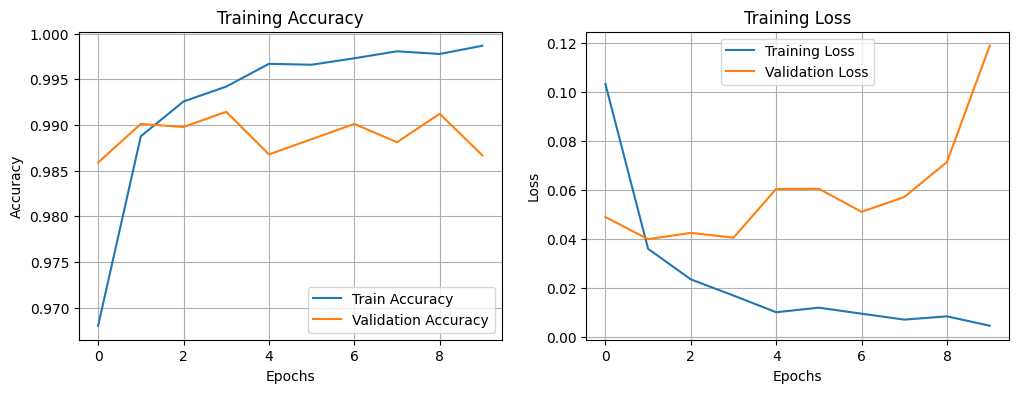

In [16]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.show()